Adding necessary imports-
1. Tensorflow:
TensorFlow is an open-source library developed by Google for machine learning and deep learning.

It helps create and train neural networks for tasks like image classification, object detection, and more.


2. Numpy:
NumPy (Numerical Python) is a library for working with arrays, matrices, and mathematical operations.

It is much faster than Python lists when handling large numerical computations.


3. matplotlib:
Matplotlib is a data visualization library used to create graphs, charts, and plots.

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# let's prepare the data and generate the data

from tensorflow.keras.preprocessing.image import ImageDataGenerator

gen_train = ImageDataGenerator(rescale = 1/255, shear_range = 0.2, zoom_range = 0.2, 
                               brightness_range = (0.1, 0.5), horizontal_flip=True)

train_data = gen_train.flow_from_directory("/kaggle/input/waste-classification-data/DATASET/TRAIN",
                                           target_size = (224, 224), batch_size = 32, class_mode="categorical")

Found 22564 images belonging to 2 classes.


This code is preparing and generating image data for a deep learning model using TensorFlow’s ImageDataGenerator(It is a tool in TensorFlow that automatically preprocesses images before training).
Now,
1. "/kaggle/input/waste-classification-data/DATASET/TRAIN" specifies Folder containing images sorted into subfolders (one for each class).

2. target_size = (224, 224) specifies Resizes all images to 224x224 pixels (standard for CNNs like ResNet/VGG).

3. batch_size = 32  Loads images in batches of 32 (for faster training).

4. class_mode="categorical" is used  For multi-class classification (each image belongs to one of many categories).


In [4]:
# let's create a model
# here i'm going to use VGG16 model's parameter to solve this problem

from tensorflow.keras.applications.vgg16 import VGG16

# here i'm going to take input shape, weights and bias from imagenet and include top False means
# i want to add input, flatten and output layer by my self

vgg16 = VGG16(input_shape = (224, 224, 3), weights = "imagenet", include_top = False)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


Model used :VGG16
VGG16 is a pretrained deep learning model used for image classification.
How Does VGG16 Work?
VGG16 is a deep CNN with:

13 convolutional layers (for feature extraction)

3 fully connected layers (for classification)

Max pooling layers (to reduce image size)

ReLU activation functions (to add non-linearity)

📌 Input: Image (224×224 pixels)
📌 Output: Class label (e.g., dog, cat, car, etc.)

In [5]:
# now vgg16 weights are already train so i don't want to train that weights again
# so let's make trainable = False

for layer in vgg16.layers:
  layer.trainable = False

In [6]:
# let's add flatten layer or let's connect VGG16 with our own flatten layer

from tensorflow.keras import layers

x = layers.Flatten()(vgg16.output)

In [7]:
# now let's add output layers or prediction layer

prediction = layers.Dense(units = 2, activation="softmax")(x)

# creating a model object

model = tf.keras.models.Model(inputs = vgg16.input, outputs=prediction)
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 2)                   │          50,178 │
└──────────────────────────────────────┴─────────────────────────────┴──────────────

 Total params: 14,764,866 (56.32 MB)

 Trainable params: 50,178 (196.01 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [8]:
# now let's compile the model

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics =["accuracy"])

result = model.fit(train_data, epochs=15,steps_per_epoch=len(train_data))


Epoch 1/15


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


706/706 ━━━━━━━━━━━━━━━━━━━━ 416s 563ms/step - accuracy: 0.7562 - loss: 0.5332
Epoch 2/15
706/706 ━━━━━━━━━━━━━━━━━━━━ 0s 12us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/15


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


706/706 ━━━━━━━━━━━━━━━━━━━━ 272s 382ms/step - accuracy: 0.8332 - loss: 0.3972
Epoch 4/15
706/706 ━━━━━━━━━━━━━━━━━━━━ 0s 6us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/15
706/706 ━━━━━━━━━━━━━━━━━━━━ 270s 378ms/step - accuracy: 0.8449 - loss: 0.3766
Epoch 6/15
706/706 ━━━━━━━━━━━━━━━━━━━━ 0s 6us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 7/15
706/706 ━━━━━━━━━━━━━━━━━━━━ 269s 377ms/step - accuracy: 0.8391 - loss: 0.3865
Epoch 8/15
706/706 ━━━━━━━━━━━━━━━━━━━━ 0s 6us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 9/15
706/706 ━━━━━━━━━━━━━━━━━━━━ 270s 379ms/step - accuracy: 0.8475 - loss: 0.3692
Epoch 10/15
706/706 ━━━━━━━━━━━━━━━━━━━━ 0s 6us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 11/15
706/706 ━━━━━━━━━━━━━━━━━━━━ 269s 376ms/step - accuracy: 0.8452 - loss: 0.3883
Epoch 12/15
706/706 ━━━━━━━━━━━━━━━━━━━━ 0s 6us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 13/15
706/706 ━━━━━━━━━━━━━━━━━━━━ 269s 377ms/step - accuracy: 0.8596 - loss: 0.35

In [9]:
from tensorflow.keras.preprocessing import image
output_class = ['O','R']
def waste_prediction(new_image):
  test_image = image.load_img(new_image, target_size = (224,224))
  plt.axis("off")
  plt.imshow(test_image)
  plt.show()
 
  test_image = image.img_to_array(test_image) / 255
  test_image = np.expand_dims(test_image, axis=0)

  predicted_array = model.predict(test_image)
  predicted_value = output_class[np.argmax(predicted_array)]
  predicted_accuracy = round(np.max(predicted_array) * 100, 2)

  print("Your waste material is ", predicted_value, " with ", predicted_accuracy, " % accuracy")

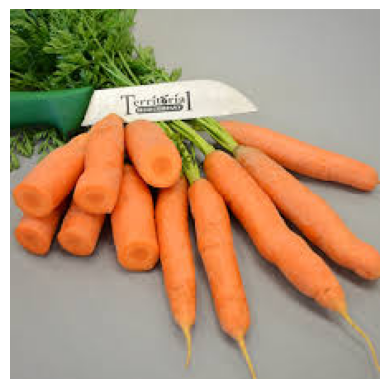

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Your waste material is  O  with  100.0  % accuracy


In [10]:
waste_prediction("/kaggle/input/waste-classification-data/DATASET/TEST/O/O_12570.jpg")


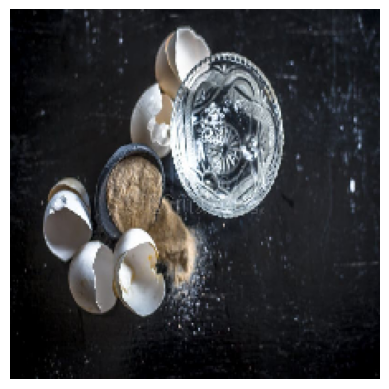

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Your waste material is  O  with  79.15  % accuracy


In [14]:
waste_prediction("/kaggle/input/waste-classification/Organic/Organic/egg_shells/-as-calcium-supplement-popular-asia-india-powder-ground-egg-shells-119970282.jpg")


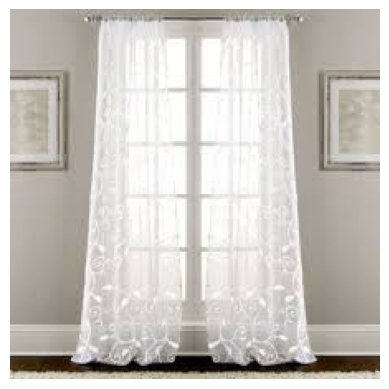

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Your waste material is  R  with  100.0  % accuracy


In [11]:
waste_prediction("/kaggle/input/waste-classification-data/DATASET/TEST/R/R_10009.jpg")


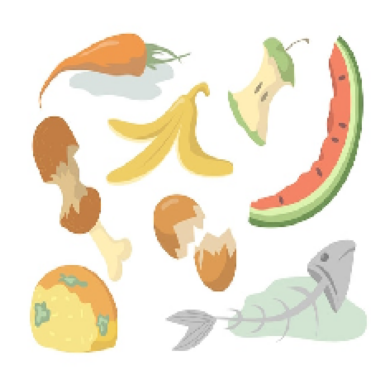

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Your waste material is  O  with  100.0  % accuracy


In [12]:
waste_prediction("/kaggle/input/waste-classification/Organic/Organic/food_scraps/-bread-organic-waste-isolated-shite-background-flat-illustration_74855-14373.jpg")



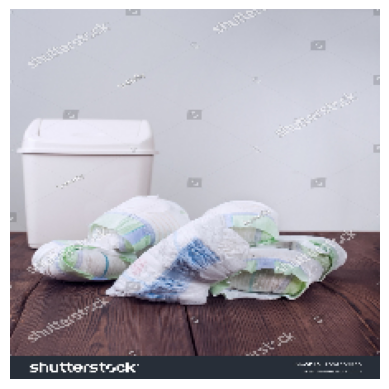

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Your waste material is  R  with  56.77  % accuracy


In [13]:

waste_prediction("/kaggle/input/waste-classification/Non-Recyclable/Non-Recyclable/diapers/-garbage-pail-disposing-of-used-baby-nappies-environmental-impact-2084386903.jpg")



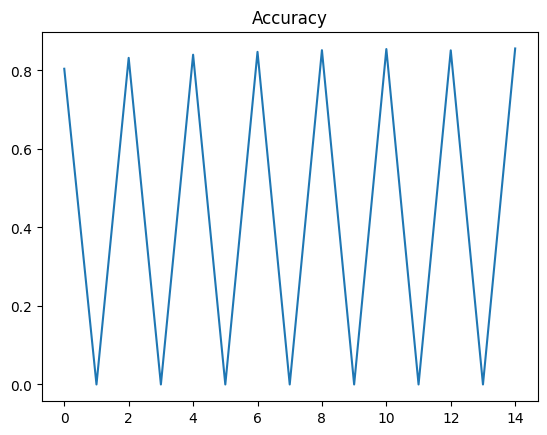

In [11]:
plt.title("Accuracy")
plt.plot(result.history["accuracy"])
plt.show()

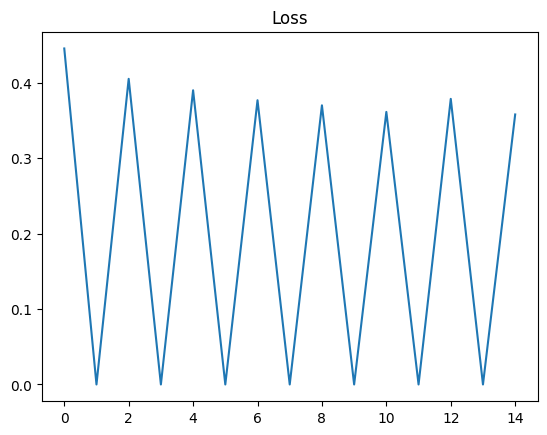

In [12]:
plt.title("Loss")
plt.plot(result.history["loss"])
plt.show()

In [15]:
model.save("classifyWaste.h5")